### Integrantes:
- Carlos Quintero Piedrahita
- Alejandro Ruiz
- Priscila Acosta
- Verónica Jímenez Ramirez

### Cargamos e instalamos las librerías


In [1]:
!pip install spacy;
!python -m spacy download es_core_news_sm;
!pip install num2words;


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
2024-10-15 19:52:36.828095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-15 19:52:36.992997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-15 19:52:36.993034: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-15 19:52:37.034377: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for 

In [2]:
import unicodedata
import re
from num2words import num2words
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-15 19:52:47.499740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-15 19:52:47.666321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-15 19:52:47.666354: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
202

### Texto

In [3]:
dinosaurios = """Los dinosaurios, del superorden Dinosauria (del griego δεινός deinós ‘terrible’ y σαῦρος sauros ‘lagarto’, ‘lagartos terribles’) son un grupo de saurópsidos7​8​ diápsidos arcosaurios que aparecieron durante el período Triásico con distribución cosmopolita. Aunque el origen exacto y su diversificación temprana es tema de activa investigación,9​ el consenso científico actual sitúa su origen entre 245 y 231 millones de años atrás, entre el Triásico Medio al Superior.10​

Fueron los vertebrados terrestres dominantes durante 135 millones de años, desde el inicio del Jurásico, hace unos 200 millones de años, a partir de la extinción masiva del Triásico-Jurásico, hasta el final del Cretácico, hace 66 millones de años, cuando la mayoría de los grupos de dinosaurios se extinguieron durante la extinción masiva del Cretácico-Paleógeno que puso fin a la Era Mesozoica. El registro fósil indica que las aves evolucionaron a partir de dinosaurios terópodos durante el período Jurásico y, en consecuencia, muchos taxónomos consideran que las aves forman un subgrupo dentro de los dinosaurios.11​ Algunas aves sobrevivieron a este acontecimiento, y sus descendientes continúan el linaje de los dinosaurios hasta nuestros días.12​ Por lo tanto, los dinosaurios se pueden dividir en dinosaurios aviares, las aves en un sentido estricto, y los dinosaurios no aviares, todos extintos, que son todos dinosaurios distintos de las aves.

Los dinosaurios son un grupo diverso de animales desde el punto de vista taxonómico, morfológico y ecológico. Usando la evidencia fósil, los paleontólogos han identificado cerca de 900 géneros distintos13​ y más de 1000 especies diferentes de dinosaurios no avianos.14​ Los dinosaurios están representados en todos los continentes tanto por especies existentes, las aves, como por restos fósiles.

Algunos son herbívoros, otros carnívoros u omnívoros. Los primeros dinosaurios fueron bípedos, pero muchos grupos incluyeron especies cuadrúpedas, y algunos podían alternar los dos tipos de locomoción. Los cuernos o crestas son comunes a todos los grupos de dinosaurios, y algunos grupos desarrollaron modificaciones esqueléticas como armaduras óseas y espinas. La evidencia sugiere que la puesta de huevos y la construcción de nidos fueron rasgos que compartían todos los dinosaurios. Muchos dinosaurios eran de gran porte, el dinosaurio saurópodo más grande pudo haber alcanzado una longitud de 40 m y 18 m de altura y una masa estimada máxima de 140 t. Sin embargo, la idea de que los dinosaurios no aviares fueron todos gigantescos es un error basado en el sesgo de conservación, ya que los huesos grandes y fuertes tienen más probabilidad de durar hasta que se fosilicen. Muchos dinosaurios eran bastante pequeños, algunos median solamente unos 50 cm de largo.

Aunque la palabra dinosaurio significa ‘lagarto terrible’, el nombre es un poco engañoso, ya que los dinosaurios no son lagartos. En cambio, representan un grupo separado de reptiles que, como muchas formas extintas, no muestran características tradicionalmente vistas como propias de un reptil, como la postura extendida hacia los lados de las extremidades o la ectotermia. Además, muchos animales prehistóricos, incluidos los ictiosaurios, mosasaurios, plesiosaurios, pterosaurios y pelicosaurios, como Dimetrodon, son popularmente concebidos como dinosaurios, pero no están clasificados taxonómicamente como tales. A lo largo de la primera mitad del siglo XX, antes de que las aves fueran reconocidas como dinosaurios, la mayor parte de la comunidad científica creía que los dinosaurios habían sido lentos y de sangre fría. No obstante, la mayoría de las investigaciones realizadas desde la década de 1970 han indicado que todos los dinosaurios eran animales activos con metabolismo elevado y numerosas adaptaciones para la interacción social.15​

Desde que en el siglo XIX se reconocieron los primeros fósiles de dinosaurio, los esqueletos fósiles montados han sido la principal atracción de muchos museos de todo el mundo, y los dinosaurios se han convertido en parte permanente de la cultura mundial. El gran tamaño de algunos grupos, así como su naturaleza aparentemente monstruosa y fantástica, han asegurado apariciones regulares de dinosaurios en los libros de mayor venta y en películas como Parque Jurásico. El persistente entusiasmo del público por estos animales ha dado lugar a una importante financiación para la investigación científica de los dinosaurios, y los nuevos descubrimientos son dados a conocer regularmente en los medios de comunicación."""

### Normalizamos el Texto

In [4]:
def Normalizar_texto(texto):

    # Convertimos todo el texto a minúsculas
    texto_minusculas = texto.lower()

    # Codigo para quitar las tildes de un texto
    texto_normalizado = unicodedata.normalize('NFD', texto_minusculas)
    texto_sin_tildes = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')

    # Eliminamos carácteres especiales de un texto
    texto_sin_caracteres = re.sub(r'[^A-Za-z0-9áéíóúÁÉÍÓÚñÑ\s]', '', texto_sin_tildes)

    # Quita las preposiciones, conectores, etc... de un texto
    preposiciones = ['y', 'e', 'ni', 'que', 'o', 'u', 'pero', 'aunque', 'sin embargo', 'no obstante', 'es decir', 'o sea', 'por lo tanto', 'por consiguiente', 'de modo que',
                 'así que', 'entonces', 'además', 'incluso', 'asimismo', 'por ejemplo','yo', 'tú', 'vos','usted', 'él', 'ella', 'nosotros', 'nosotras',
                 'vosotros', 'vosotras', 'ustedes', 'ellos', 'ellas', 'me', 'te', 'son','un','el','es','al','unos','era','dentro','este','sus','no','tanto','pueden','como','una','m',
                 'se', 'nos', 'os', 'mi', 'mío', 'mía', 'míos', 'mías', 'tu', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'su', 'suyo', 'suya', 'suyos', 'tales','asi','estos',
                 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'le', 'les', 'lo', 'los', 'la', 'las','a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde',
                 'durante', 'en','del', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras', 'versus', 'vía']
    palabras = texto_sin_caracteres.split()
    texto_sin_preposiciones = [palabra for palabra in palabras if palabra not in preposiciones]
    texto_sin_preposiciones = ' '.join(texto_sin_preposiciones)

    # Función para eliminar los super-índices pegados en el texto.
    texto_sin_indices = re.sub(r'(\b[A-Za-zÀ-ÿ]+)\d+', r'\1', texto_sin_preposiciones)

    #Función que quita los doble espacios de un texto y deja solo un espacio.
    texto_sin_2espacios = re.sub(r'\s+', ' ', texto_sin_indices)

    return texto_sin_2espacios

In [5]:
texto_limpio = Normalizar_texto(dinosaurios)
texto_limpio

'dinosaurios superorden dinosauria griego deinos terrible sauros lagarto lagartos terribles grupo sauropsidos diapsidos arcosaurios aparecieron periodo triasico distribucion cosmopolita origen exacto diversificacion temprana tema activa investigacion consenso cientifico actual situa origen 245 231 millones anos atras triasico medio superior fueron vertebrados terrestres dominantes 135 millones anos inicio jurasico hace 200 millones anos partir extincion masiva triasicojurasico final cretacico hace 66 millones anos cuando mayoria grupos dinosaurios extinguieron extincion masiva cretacicopaleogeno puso fin mesozoica registro fosil indica aves evolucionaron partir dinosaurios teropodos periodo jurasico consecuencia muchos taxonomos consideran aves forman subgrupo dinosaurios algunas aves sobrevivieron acontecimiento descendientes continuan linaje dinosaurios dias dinosaurios dividir dinosaurios aviares aves sentido estricto dinosaurios aviares todos extintos todos dinosaurios distintos av

### Tokenizamos y Lematizamos

In [6]:
texto_tokenizado = texto_limpio.split(" ") # Tokenización separado por espacios
texto_tokenizado;

In [7]:
nlp = spacy.load("es_core_news_sm") # modelo de procesamiento de lenguaje natural (NLP) de spaCy para el idioma español

def lemmatize_text(tokens):
  doc = nlp(" ".join(tokens))
  lemmas = [token.lemma_ for token in doc]
  return lemmas

lemmas_dinosaurios= lemmatize_text(texto_tokenizado)
print(lemmas_dinosaurios)

['dinosaurio', 'superordir', 'dinosauria', 'griego', 'deino', 'terrible', 'sauro', 'lagarto', 'lagarto', 'terrible', 'grupo', 'sauropsido', 'diapsido', 'arcosaurio', 'aparecer', 'periodo', 'triasico', 'distribucion', 'cosmopolita', 'origen', 'exacto', 'diversificacion', 'temprano', 'tema', 'activo', 'investigacion', 'consenso', 'cientifico', 'actual', 'situo', 'origen', '245', '231', 'millón', 'ano', 'atra', 'triasico', 'medio', 'superior', 'ser', 'vertebrar', 'terrestre', 'dominant', '135', 'millón', 'ano', 'inicio', 'jurasico', 'hacer', '200', 'millón', 'ano', 'partir', 'extincion', 'masivo', 'triasicojurasico', 'final', 'cretacico', 'hacer', '66', 'millón', 'ano', 'cuando', 'mayoriar', 'grupo', 'dinosaurio', 'extinguir', 'extincion', 'masivo', 'cretacicopaleogeno', 'poner', 'fin', 'mesozoico', 'registro', 'fosil', 'indicar', 'ave', 'evolucionar', 'partir', 'dinosaurio', 'teropodo', 'periodo', 'jurasico', 'consecuenciar', 'mucho', 'taxonomo', 'considerar', 'ave', 'formar', 'subgrupo'

### Gráficos y Resultados

Las 10 palabras más frecuentes:
dinosaurio: 29
ser: 10
grupo: 8
todo: 8
mucho: 7
haber: 7
alguno: 6
fosil: 5
ave: 5
lagarto: 4



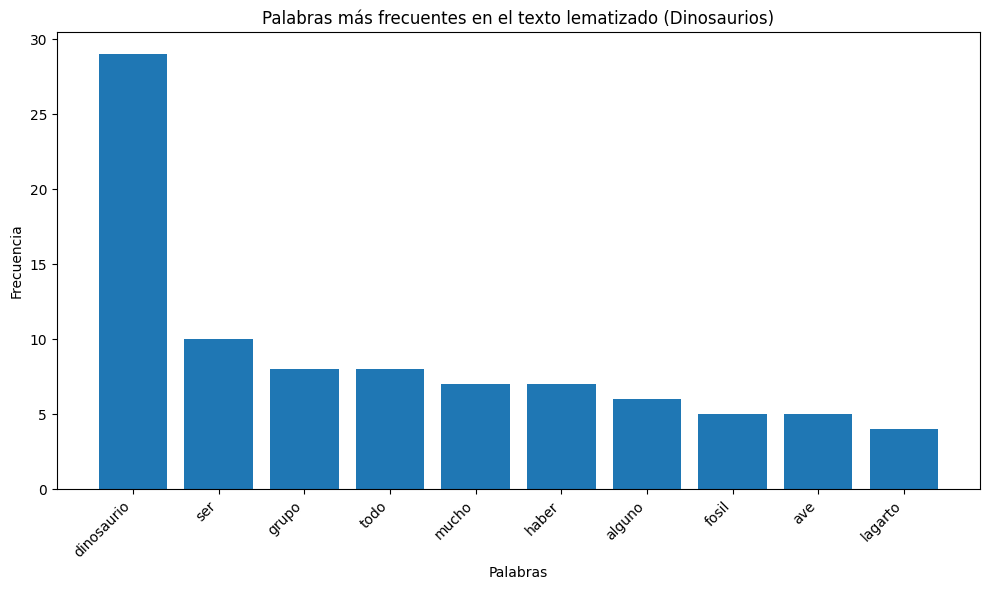

NameError: name 'word_counts' is not defined

In [8]:
# Mostrar las 10 palabras más frecuentes
most_common_words = Counter(lemmas_dinosaurios).most_common(10) # Contar la frecuencia de las palabras lematizadas y sacamos el top 10
print("Las 10 palabras más frecuentes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

print("")

# Crear un gráfico de barras para visualizar la frecuencia de las palabras
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en el texto lematizado (Dinosaurios)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("")

# Crear una tabla con la frecuencia de las palabras
df_word_counts = pd.DataFrame(word_counts.most_common(), columns=['Palabra', 'Frecuencia'])
print("Tabla de frecuencia de palabras:")
print(df_word_counts)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ca2eee6-83d0-4ad3-842a-26b6e23e6ac9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>